# BASIC CONFIGURATIONS

In [1]:
### Setup the library ###
import pyrogue as pr
import os, sys
import matplotlib.pyplot as plt
import time
import datetime
import numpy as np
import math
import pprint
import inspect 
top_level=f'{os.getcwd()}/../'
rootTopLevel = top_level+'script/'
pr.addLibraryPath( rootTopLevel )

import setupLibPaths

import ePix320kM as devBoard

args = None

In [2]:
# ONLY RUN ONCE!
# Defining root
# If crashes, make sure the deve is correct.
root =  devBoard.Root(   
        top_level  = top_level,
        dev        = '/dev/datadev_0',
        pollEn     = False,
        initRead   = True,
        pciePgpEn  = True,
        justCtrl   = False,
        DDebugSize = 4000)
root.start()

# example showing a read
AxiVersion = root.Core.AxiVersion
print ( '###################################################')
print ( '#             Firmware Version                    #')
print ( '###################################################')
AxiVersion.printStatus()
print ( '###################################################')

Root.Core.Si5345Pll.Page0.DataBlock.setPollInterval(1)
Start: Started zmqServer on ports 9099-9101
    To start a gui: python -m pyrogue gui --server='localhost:9099'
    To use a virtual client: client = pyrogue.interfaces.VirtualClient(addr='localhost', port=9099)
Root.Core.AxiVersion count reset called
Root.pciePgp.AxiPcieCore.AxiVersion count reset called
###################################################
#             Firmware Version                    #
###################################################
Path         = Root.Core.AxiVersion
FwVersion    = 0x1011100
UpTime       = 2:17:00
GitHash      = 0xa684962d65ccf406d3f32b874a41aad57c9807c
XilinxDnaId  = 0x4002000001608a0624908205
FwTarget     = ePixHRM320k
BuildEnv     = Vivado v2023.1
BuildServer  = rdsrv314 (Ubuntu 20.04.6 LTS)
BuildDate    = Sun 03 Nov 2024 05:30:08 AM PST
Builder      = dnajjar
###################################################


In [3]:
#Run this from a teminal in your localhost without the (!). If you run it here, it will open on rdsrv314 Jupyter server terminal and you won't see it.
#!python -m pyrogue gui --server='localhost:9099'

In [8]:
# Configure clock to 168 MHz and configures all ASICS
root.InitASIC([4,1,1,1,1])

Rysync ASIC started
Did not find SspMonGrp_carrier file. Using generic.
Did not find SspMonGrp_carrier file. Using generic.
Did not find specific ASIC1 file. Using generic.
Did not find specific ASIC2 file. Using generic.
Did not find specific ASIC3 file. Using generic.
Did not find specific ASIC4 file. Using generic.
Init ASIC script started
Loading PLL configuration
Loading supply configuration
Loading /afs/slac.stanford.edu/g/controls/development/users/dnajjar/sandBox/epix-hr-m-320k-latest/software/notebook/..//config/ePixHRM320k_PowerSupply_Enable.yml
Loading lane delay configurations
Loading /afs/slac.stanford.edu/g/controls/development/users/dnajjar/sandBox/epix-hr-m-320k-latest/software/notebook/..//config/ePixHRM320k_SspMonGrp_carrier.yml
Loading waveforms configuration
Loading /afs/slac.stanford.edu/g/controls/development/users/dnajjar/sandBox/epix-hr-m-320k-latest/software/notebook/..//config/ePixHRM320k_RegisterControl.yml
Loading batcher configurations
Loading /afs/slac.sta

In [5]:
run helperFunctions.ipynb

# Get dark

In [25]:
frames = 100
rate = 100
savePath = "."

root.enableAllAsics(True)
DEBUGARR = [DEBUG0, DEBUG1, DEBUG2, DEBUG3]
for index, DEBUG in enumerate(DEBUGARR):
    DEBUG.enableDataDebug(True)
    DEBUG.cleanData()


root.hwTrigger(frames, rate)

# Although the triggers above may have finished, descrambling takes time
while ( frames != DEBUG2.getData().shape[2]) :
    time.sleep(1)

print("Descrambled {}".format(DEBUG2.getData().shape[2]), end='\r')
print("Data Descrambled")
for index, DEBUG in enumerate(DEBUGARR):
    print("DEBUG {} descrambled {} frames".format(index, DEBUG.getData().shape))
    np.save('./dark{}'.format(index), DEBUG.getData())

root.enableAllAsics(False)

root.disableAndCleanAllFullRateDataRcv()
root.enableDataRcv(False)
root.enableDataDebug(False)

print("Done")

Stop Triggers command executed
Set Auto Trigger command executed
Start Auto Trigger command executed
Triggers sent: 100
Stop Triggers command executed
Data Descrambled
DEBUG 0 descrambled (192, 384, 100) frames
DEBUG 1 descrambled (192, 384, 100) frames
DEBUG 2 descrambled (192, 384, 100) frames
DEBUG 3 descrambled (192, 384, 100) frames


# Error Sweep

In [ ]:
ES = APP.SoftwareDelayDetermination
ES.Taps.set(64)
ES.Start()

while(1):
    time.sleep(1)
    if(ES.Running.get() == False) :
        print("Done")
        break;

## ASIC 0

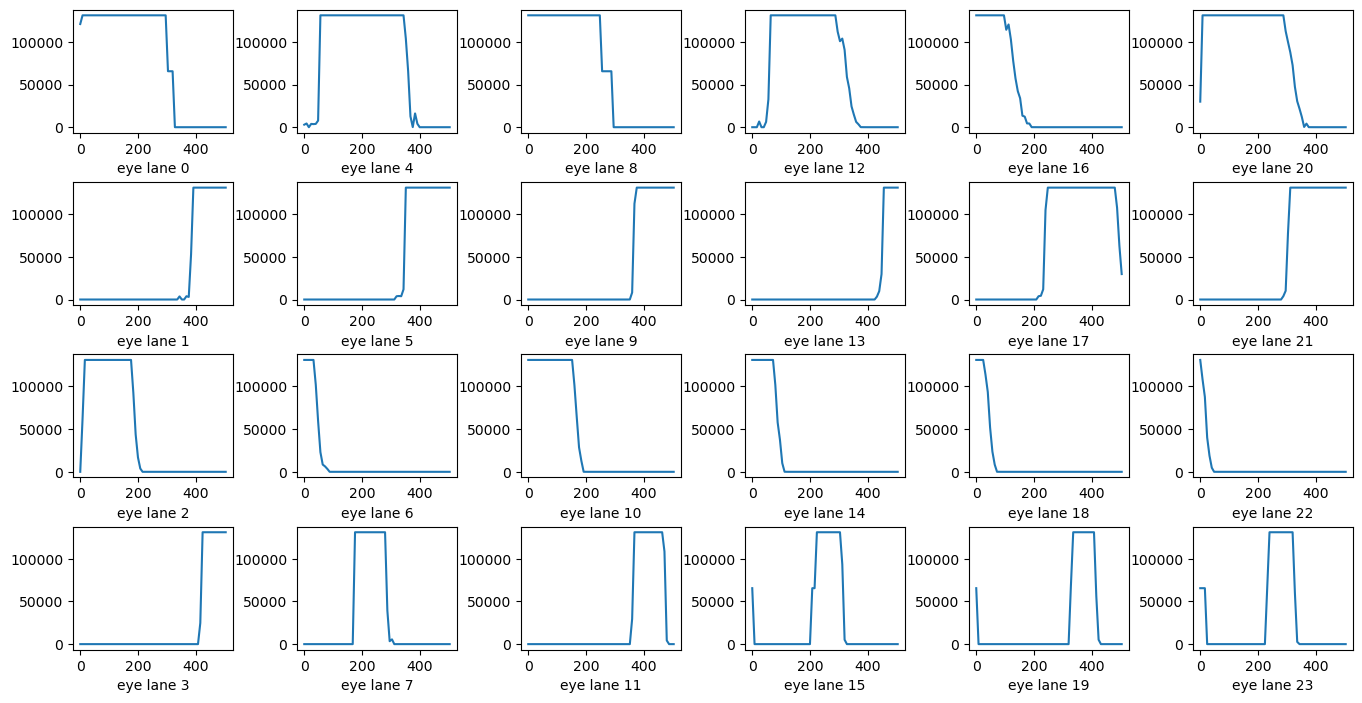

In [39]:
#ASIC 0
drawEyes(0,64)

## ASIC 1

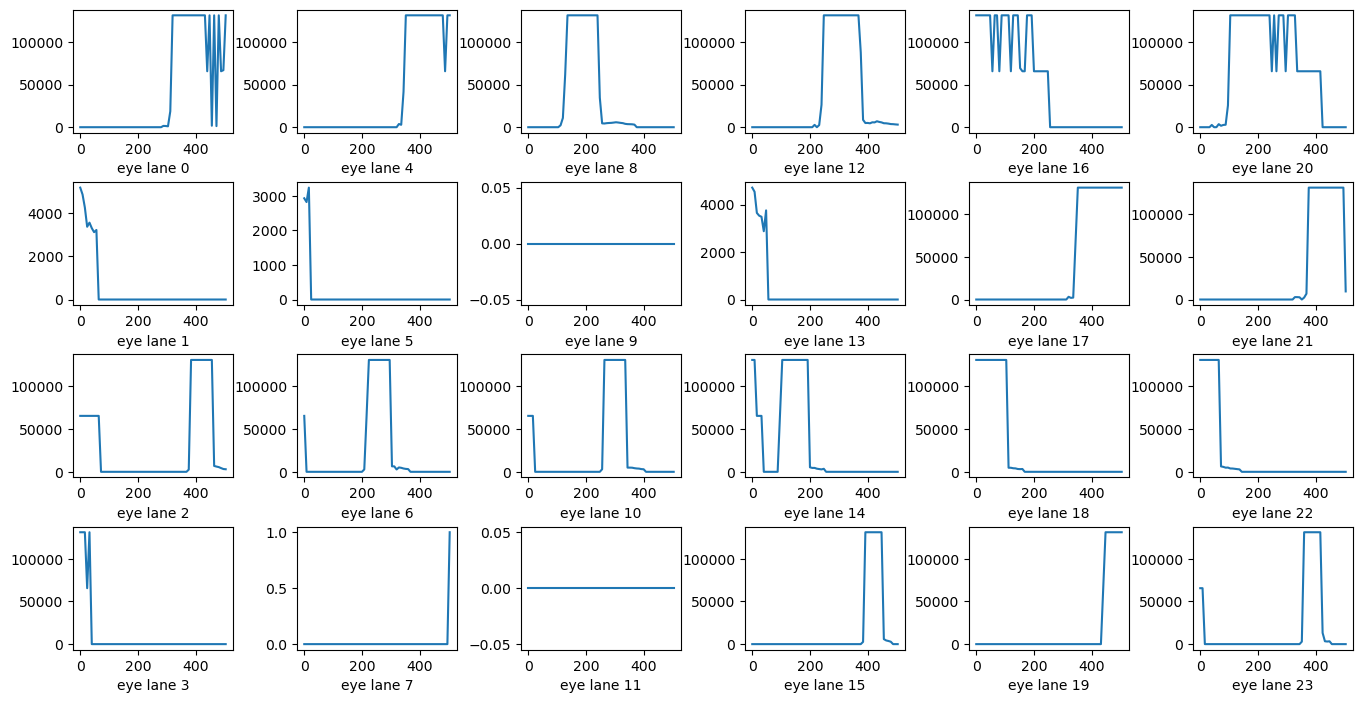

In [40]:
#ASIC 1
drawEyes(1,64)

## ASIC 2

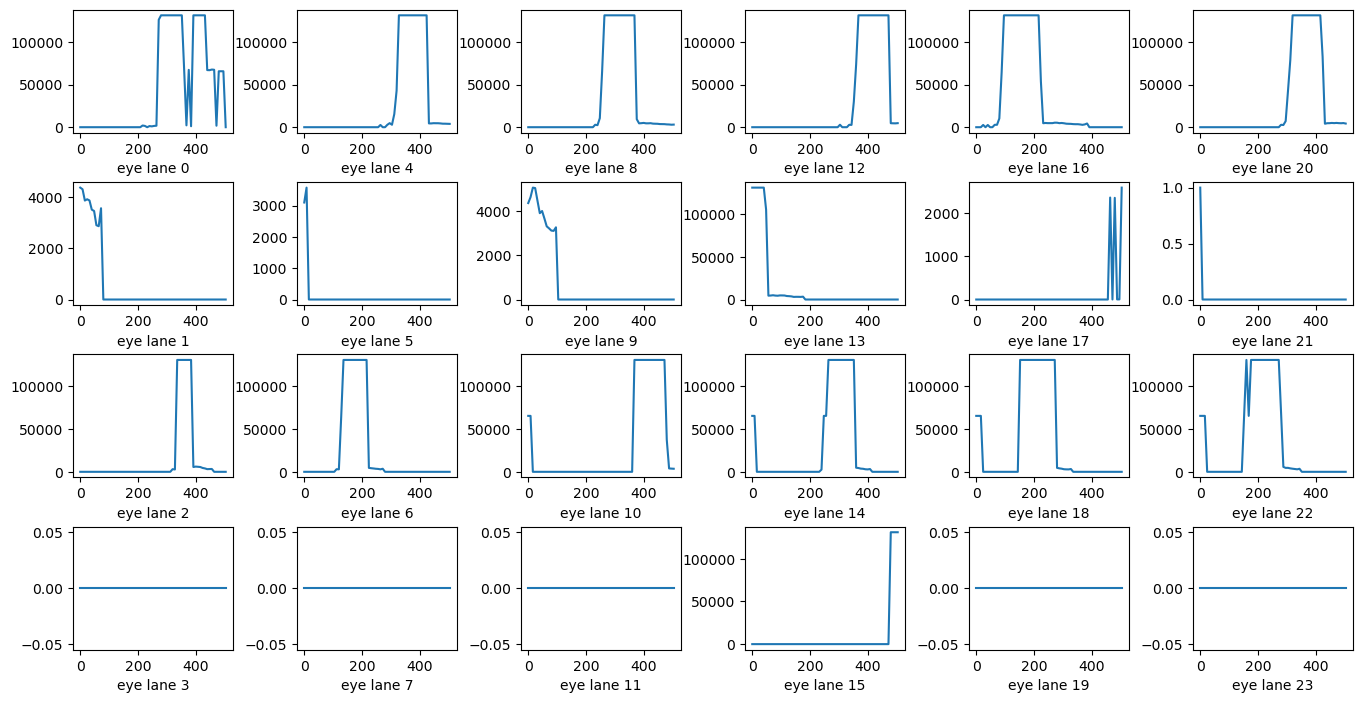

In [41]:
#ASIC 2
drawEyes(2,64)

## ASIC 3

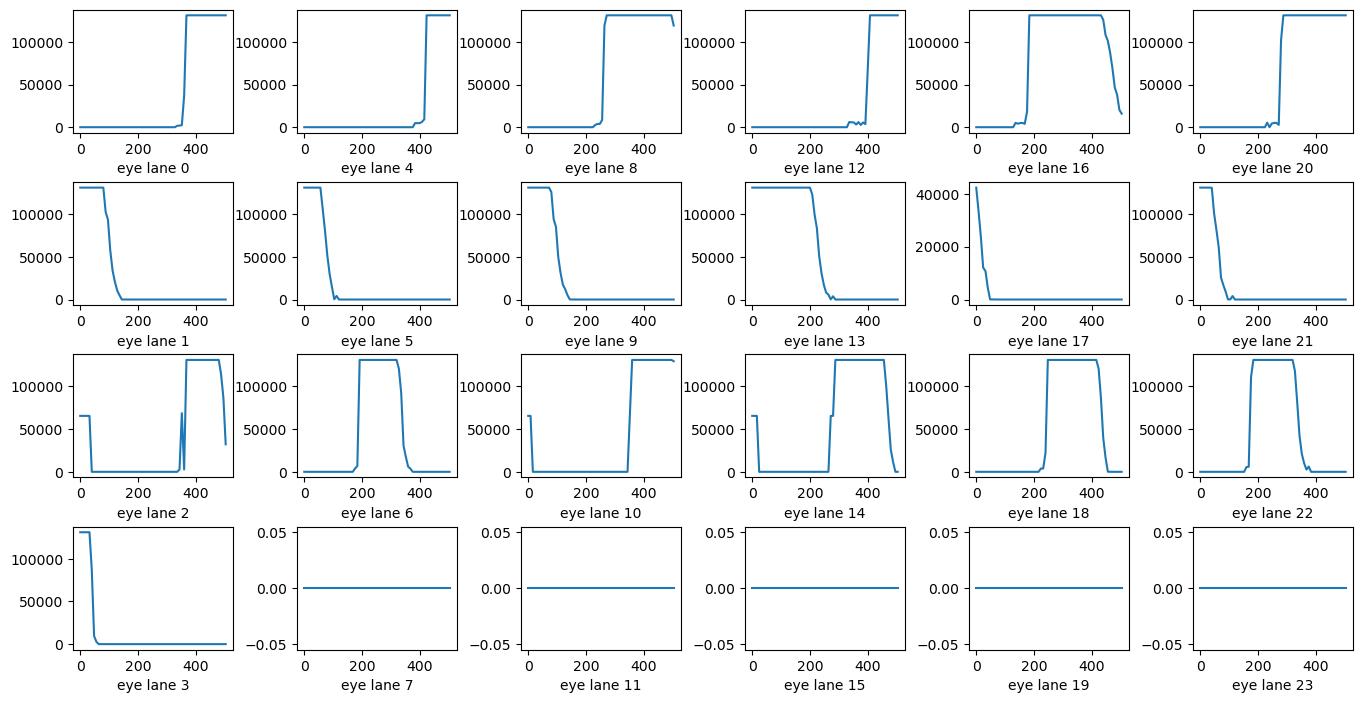

In [42]:
#ASIC 3
drawEyes(3,64)

# FPGA Charge Injection

Data Descrambled
(192, 384, 1024)


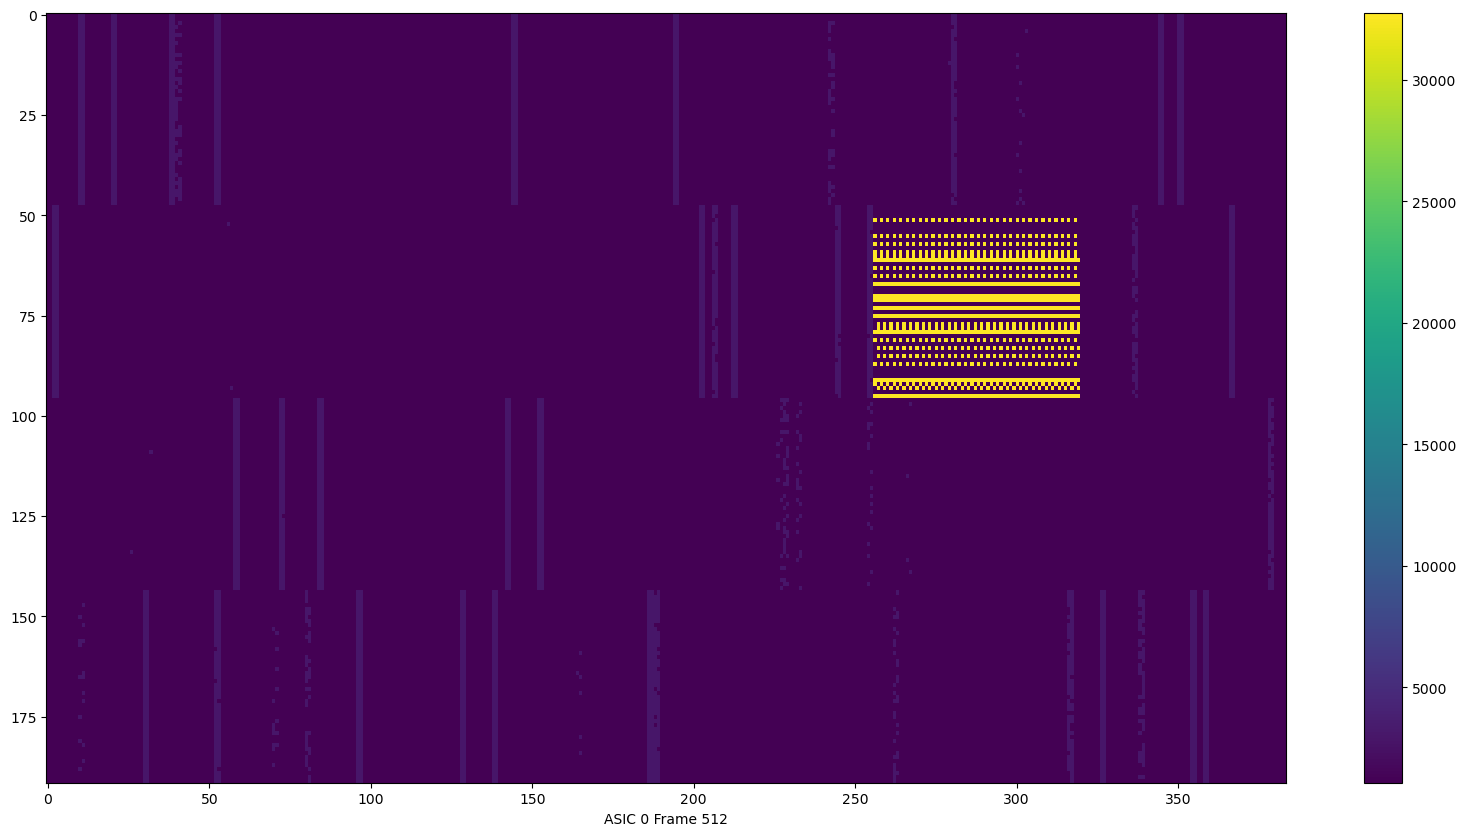

In [11]:
# ASIC 0
ASICNUM = 0
ASIC = ASIC0
DEBUG = DEBUG0
FPGAChargeInjection(ASICNUM=ASICNUM, ASIC=ASIC, DEBUG=DEBUG)

#Display image. Note that Interpolation is enabled. That is similar to auto contrast
plt.figure(figsize = (20,10))
frames = np.shape(DEBUG.getData())[2]
plt.imshow(DEBUG.getData()[:,:,int(frames/2)], interpolation='nearest', aspect='auto')
plt.xlabel("ASIC {} Frame {}".format(ASICNUM,int(frames/2)))
plt.colorbar()

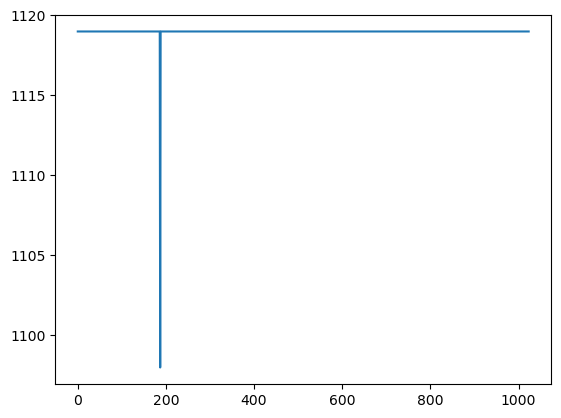

In [24]:
# plot pixel 95, 125

pixelValue = DEBUG0.getData()[95, 125, :]
plt.plot(range(0,1024),pixelValue)
plt.show()

Data Descrambled
(192, 384, 1024)


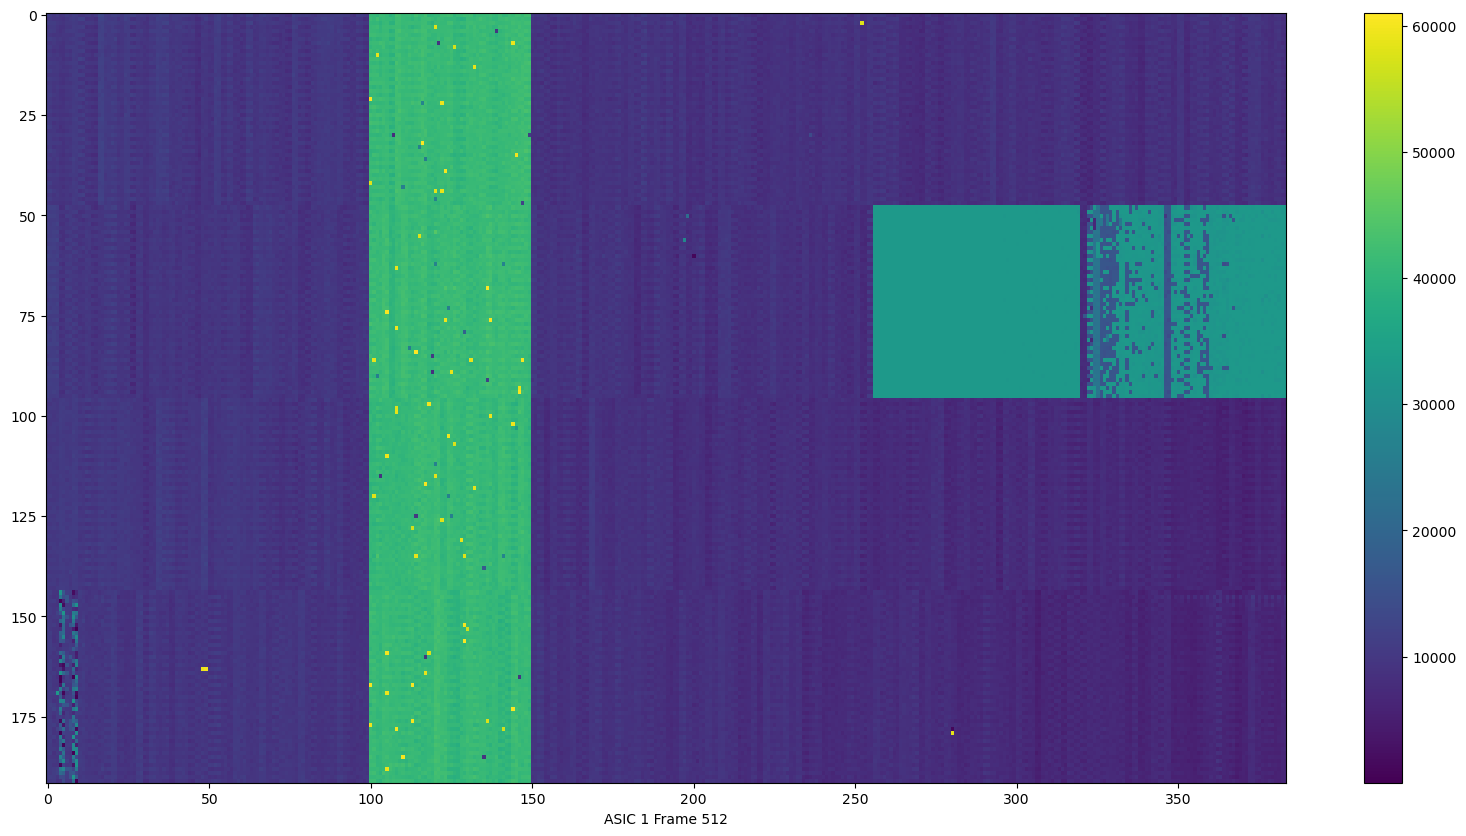

In [9]:
# ASIC 1
ASICNUM = 1
ASIC = ASIC1
DEBUG = DEBUG1
FPGAChargeInjection(ASICNUM=ASICNUM, ASIC=ASIC, DEBUG=DEBUG)

#Display image. Note that Interpolation is enabled. That is similar to auto contrast
plt.figure(figsize = (20,10))
frames = np.shape(DEBUG.getData())[2]
plt.imshow(DEBUG.getData()[:,:,int(frames/2)], interpolation='nearest', aspect='auto')
plt.xlabel("ASIC {} Frame {}".format(ASICNUM,int(frames/2)))
plt.colorbar()

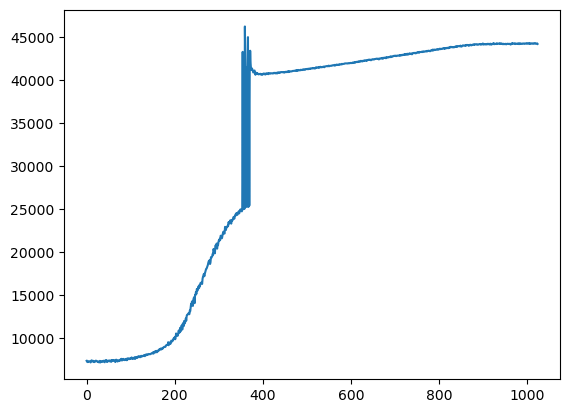

In [23]:
# plot pixel 95, 125

pixelValue = DEBUG1.getData()[95, 125, :]
plt.plot(range(0,1024),pixelValue)
plt.show()

Data Descrambled
(192, 384, 1024)


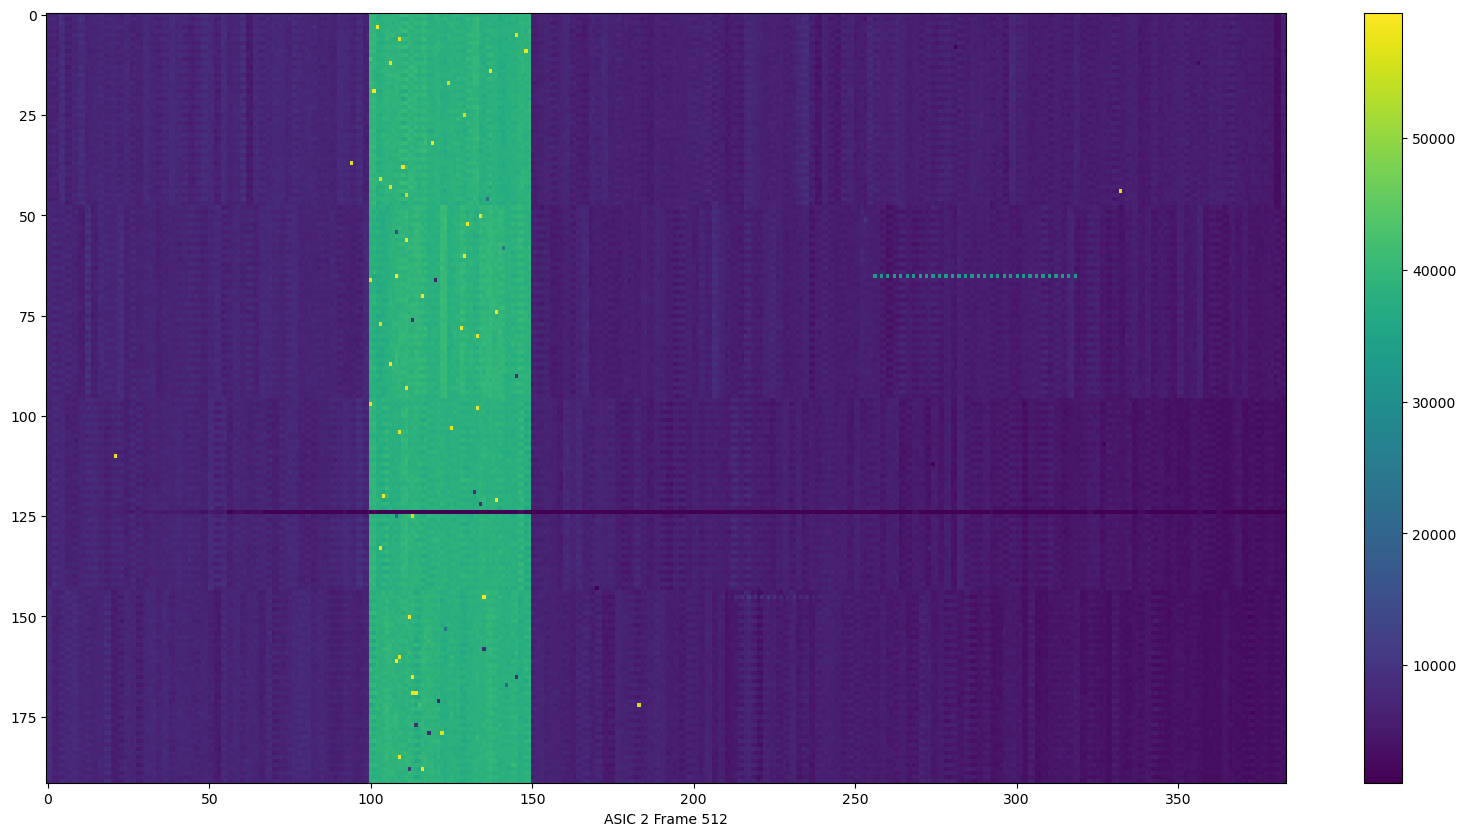

In [12]:
# ASIC 2
ASICNUM = 2
ASIC = ASIC2
DEBUG = DEBUG2
FPGAChargeInjection(ASICNUM=ASICNUM, ASIC=ASIC, DEBUG=DEBUG)

#Display image. Note that Interpolation is enabled. That is similar to auto contrast
plt.figure(figsize = (20,10))
frames = np.shape(DEBUG.getData())[2]
plt.imshow(DEBUG.getData()[:,:,int(frames/2)], interpolation='nearest', aspect='auto')
plt.xlabel("ASIC {} Frame {}".format(ASICNUM,int(frames/2)))
plt.colorbar()

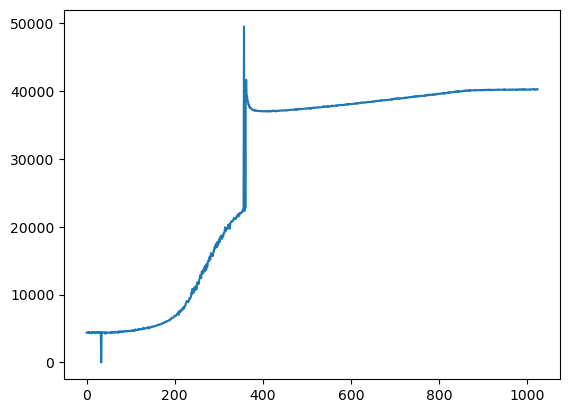

In [22]:
# plot pixel 95, 125

pixelValue = DEBUG2.getData()[95, 125, :]
plt.plot(range(0,1024),pixelValue)
plt.show()

Data Descrambled
(192, 384, 1024)


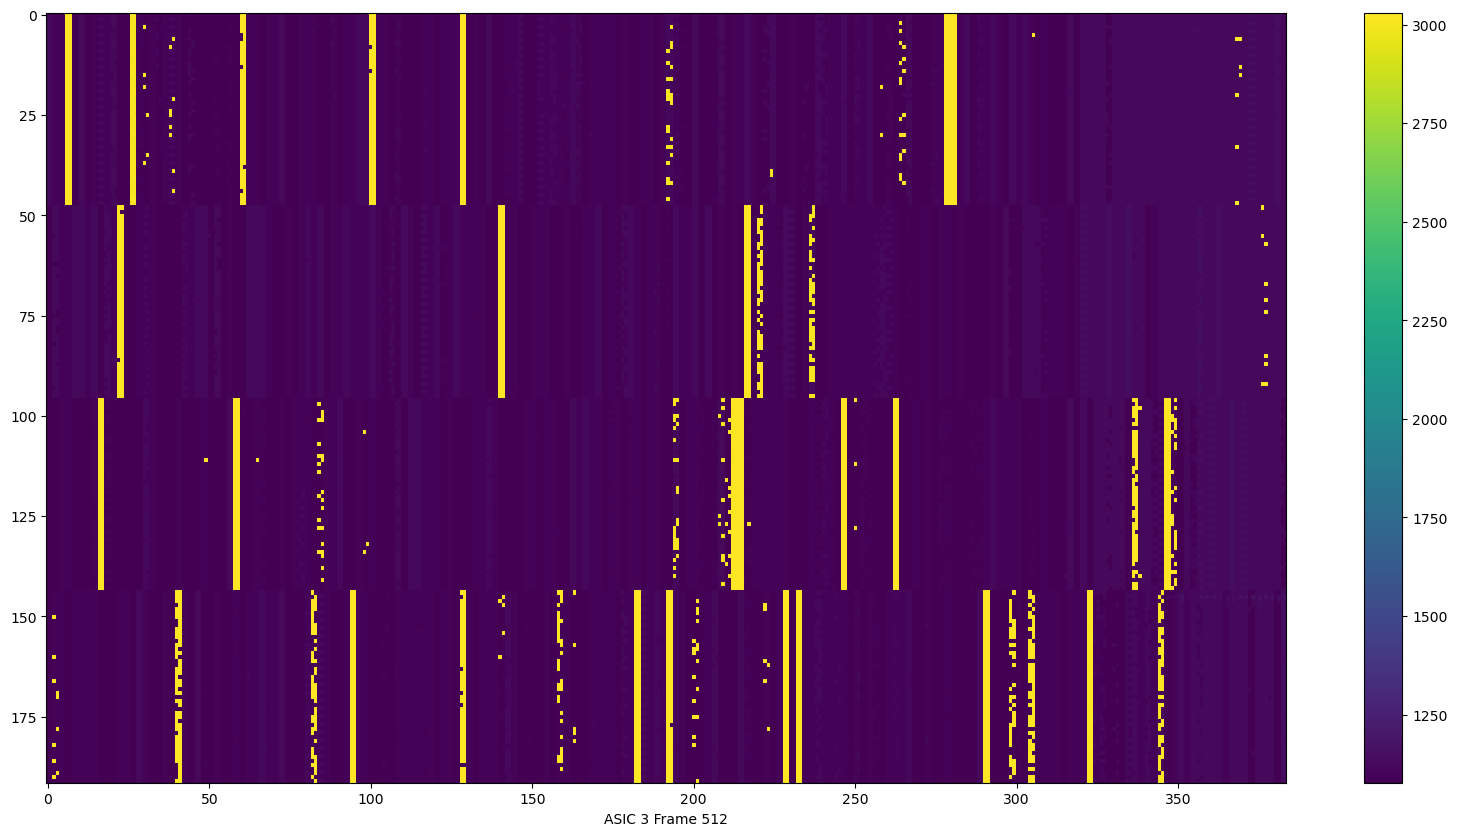

In [13]:
# ASIC 3
ASICNUM = 3
ASIC = ASIC3
DEBUG = DEBUG3
FPGAChargeInjection(ASICNUM=ASICNUM, ASIC=ASIC, DEBUG=DEBUG)

#Display image. Note that Interpolation is enabled. That is similar to auto contrast
plt.figure(figsize = (20,10))
frames = np.shape(DEBUG.getData())[2]
plt.imshow(DEBUG.getData()[:,:,int(frames/2)], interpolation='nearest', aspect='auto')
plt.xlabel("ASIC {} Frame {}".format(ASICNUM,int(frames/2)))
plt.colorbar()

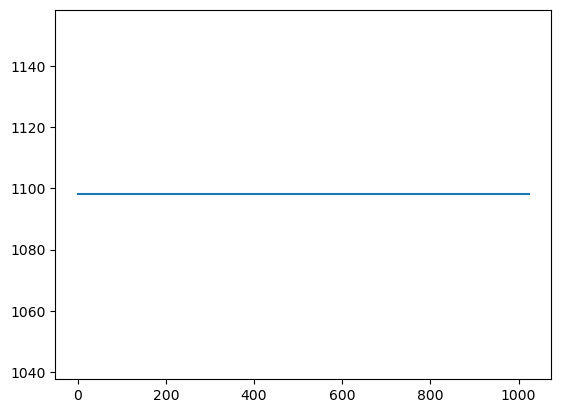

In [21]:
# plot pixel 95, 125

pixelValue = DEBUG3.getData()[95, 125, :]
plt.plot(range(0,1024),pixelValue)
plt.show()

# Laser

In [26]:
# Full rate reciever is slower than debug class, but it provides extra processing like applying dark
root.disableAndCleanAllFullRateDataRcv()
root.enableDataRcv(False)
root.enableDataDebug(False)
root.enableFullRateDataRcv(3, True)
root.enableFullRateDataRcv(2, True)
root.enableFullRateDataRcv(1, True)
root.enableFullRateDataRcv(0, True)
root.enableAllAsics(True)

# apply dark to next image
FULLRATERCV3.ApplyDark.set(False)
FULLRATERCV3.DarkReady.set(False)
FULLRATERCV3.NumDarkReq.set(1)
FULLRATERCV3.CollectDark.set(True)
while (FULLRATERCV3.DarkReady.get() == False) :
    root.Trigger()
    time.sleep(1)
FULLRATERCV3.ApplyDark.set(True)

# apply dark to next image
FULLRATERCV2.ApplyDark.set(False)
FULLRATERCV2.DarkReady.set(False)
FULLRATERCV2.NumDarkReq.set(1)
FULLRATERCV2.CollectDark.set(True)
while (FULLRATERCV2.DarkReady.get() == False) :
    root.Trigger()
    time.sleep(1)
FULLRATERCV2.ApplyDark.set(True)

# apply dark to next image
FULLRATERCV1.ApplyDark.set(False)
FULLRATERCV1.DarkReady.set(False)
FULLRATERCV1.NumDarkReq.set(1)
FULLRATERCV1.CollectDark.set(True)
while (FULLRATERCV1.DarkReady.get() == False) :
    root.Trigger()
    time.sleep(1)
FULLRATERCV1.ApplyDark.set(True)

# apply dark to next image
FULLRATERCV0.ApplyDark.set(False)
FULLRATERCV0.DarkReady.set(False)
FULLRATERCV0.NumDarkReq.set(1)
FULLRATERCV0.CollectDark.set(True)
while (FULLRATERCV0.DarkReady.get() == False) :
    root.Trigger()
    time.sleep(1)
FULLRATERCV0.ApplyDark.set(True)

ASIC:0 F#:56222 Mask:0x0
ASIC:1 F#:56222 Mask:0x0
ASIC:2 F#:56222 Mask:0x0
ASIC:3 F#:56222 Mask:0x0
ASIC:0 F#:56223 Mask:0x1010
ASIC:2 F#:56223 Mask:0x0
ASIC:1 F#:56223 Mask:0x0
ASIC:3 F#:56223 Mask:0x0

*****Dark ready*****

ASIC:3 F#:56224 Mask:0x0
ASIC:0 F#:56224 Mask:0x0
ASIC:2 F#:56224 Mask:0x0
ASIC:1 F#:56224 Mask:0x0
ASIC:3 F#:56225 Mask:0x0
ASIC:2 F#:56225 Mask:0x0
ASIC:0 F#:56225 Mask:0x0
ASIC:1 F#:56225 Mask:0x0

*****Dark ready*****

ASIC:0 F#:56226 Mask:0x0
ASIC:3 F#:56226 Mask:0x0
ASIC:2 F#:56226 Mask:0x0
ASIC:1 F#:56226 Mask:0x0
ASIC:2 F#:56227 Mask:0x0
ASIC:0 F#:56227 Mask:0x0
ASIC:3 F#:56227 Mask:0x0
ASIC:1 F#:56227 Mask:0x0

*****Dark ready*****

ASIC:2 F#:56228 Mask:0x0
ASIC:3 F#:56228 Mask:0x0
ASIC:1 F#:56228 Mask:0x0
ASIC:0 F#:56228 Mask:0x0
ASIC:0 F#:56229 Mask:0x0
ASIC:1 F#:56229 Mask:0x0
ASIC:3 F#:56229 Mask:0x0

*****Dark ready*****

ASIC:2 F#:56229 Mask:0x0


In [27]:
FULLRATERCV3.cleanData()
FULLRATERCV2.cleanData()
FULLRATERCV1.cleanData()
FULLRATERCV0.cleanData()


#run some triggers and exercise lanes and locks
root.Trigger()

ASIC:1 F#:56230 Mask:0x0
ASIC:2 F#:56230 Mask:0x0
ASIC:3 F#:56230 Mask:0x0
ASIC:0 F#:56230 Mask:0x0


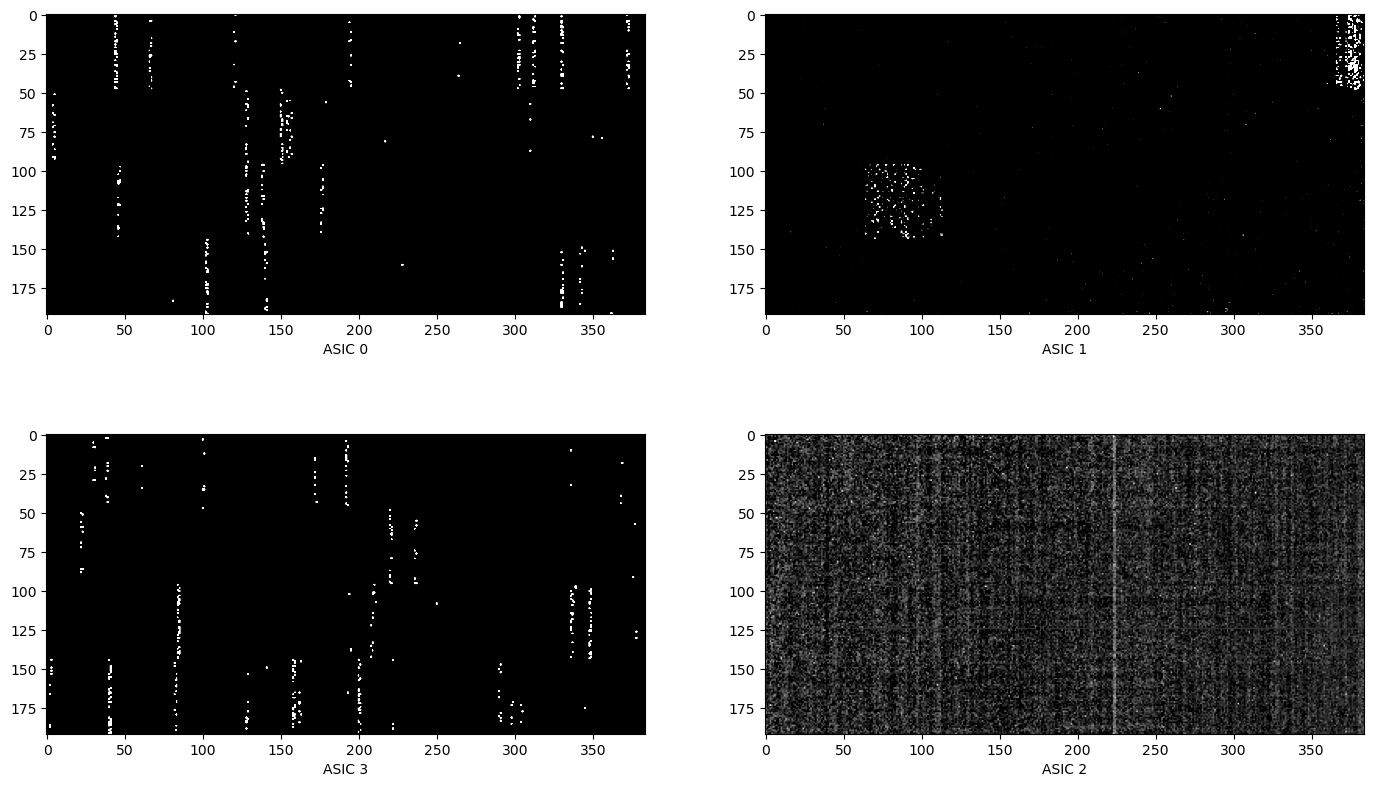

In [28]:
# Display images

plt.subplots(2,2,figsize=(17,10))
for asicIndex in range(root.numOfAsics):
    if asicIndex == 3 :
        plt.subplot(2,2,3)
        plt.imshow(FULLRATERCV3.getData()[:,:,0], cmap='Greys',  vmax = -100, vmin = -500)
        plt.xlabel("ASIC 3")
    elif asicIndex == 2 :
        plt.subplot(2,2,4)
        plt.imshow(FULLRATERCV2.getData()[:,:,0], cmap='Greys',  vmax = 100, vmin = -500)
        plt.xlabel("ASIC 2")
    elif asicIndex == 1 :
        plt.subplot(2,2,asicIndex+1)
        plt.imshow(np.rot90(FULLRATERCV1.getData()[:,:,0],2), cmap='Greys',  vmax = -100, vmin = -500)
        plt.xlabel("ASIC 1")
    else :
        plt.subplot(2,2,asicIndex+1)
        plt.imshow(np.rot90(FULLRATERCV0.getData()[:,:,0],2), cmap='Greys',  vmax = -100, vmin = -500)
        plt.xlabel("ASIC 0")

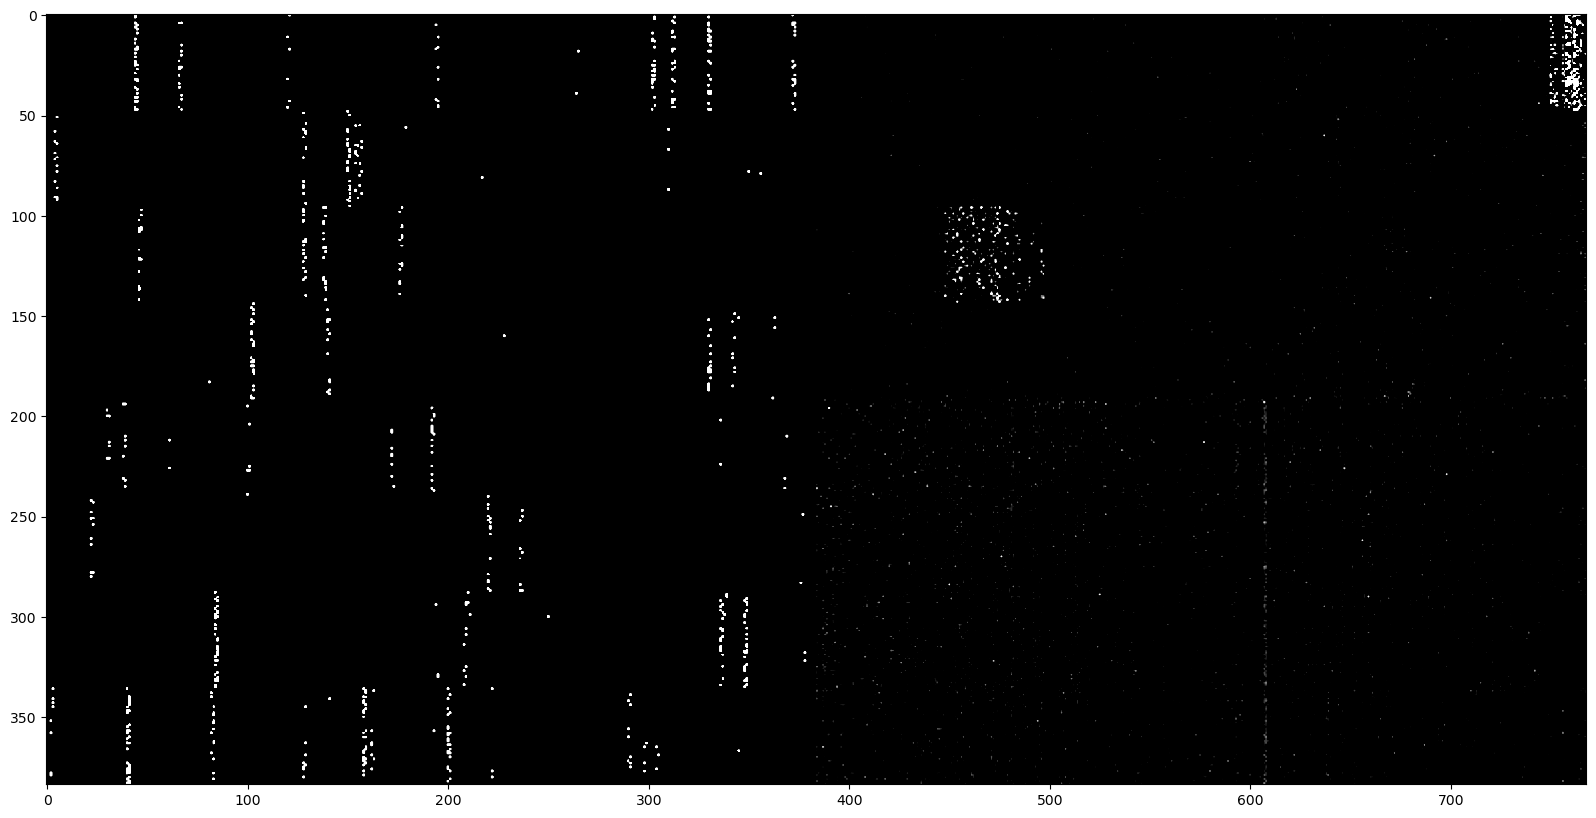

In [29]:
#plot all images together

firstRow  = np.concatenate((np.rot90(FULLRATERCV0.getData()[:,:,0],2), np.rot90(FULLRATERCV1.getData()[:,:,0],2)), axis=1)
lastRow   = np.concatenate((FULLRATERCV3.getData()[:,:,0], FULLRATERCV2.getData()[:,:,0]), axis=1)
fullImage = np.concatenate((firstRow, lastRow), axis=0)

plt.figure(figsize = (20,10))
plt.imshow(fullImage, cmap='Greys',  vmax = -100, vmin = -500)

In [31]:
# save images
np.save("./laser", fullImage)

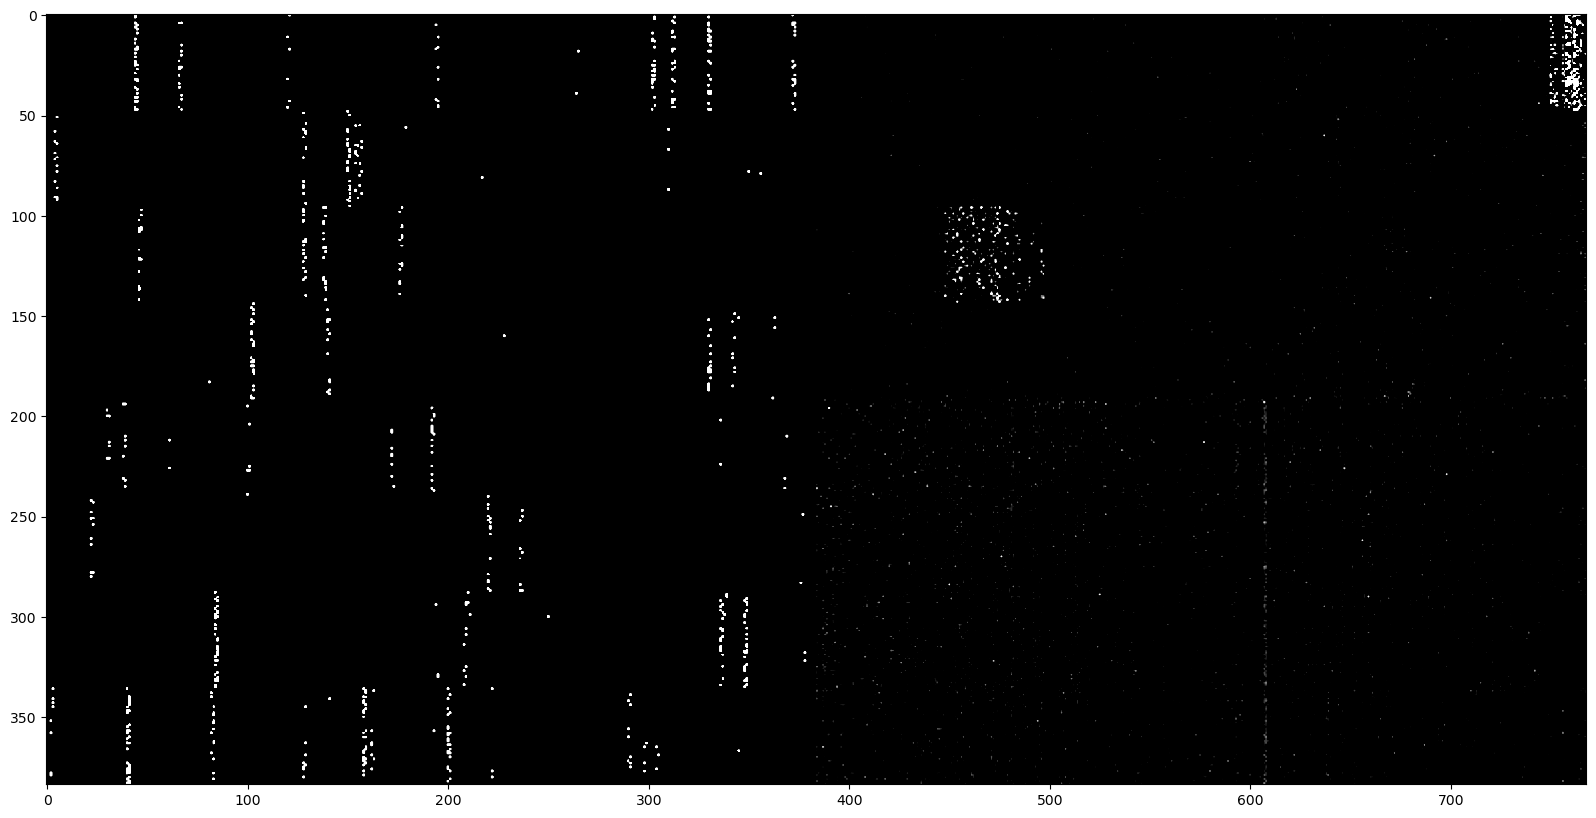

In [32]:
x = np.load("./laser.npy")
plt.figure(figsize = (20,10))
plt.imshow(x, cmap='Greys',  vmax = -100, vmin = -500)

In [33]:
x[192:,384:] = 0
inserted = x
for i in range(20):
    inserted = np.insert(inserted, 192, 0, axis=0)

for i in range(20):
    inserted = np.insert(inserted, 384, 0, axis=1)

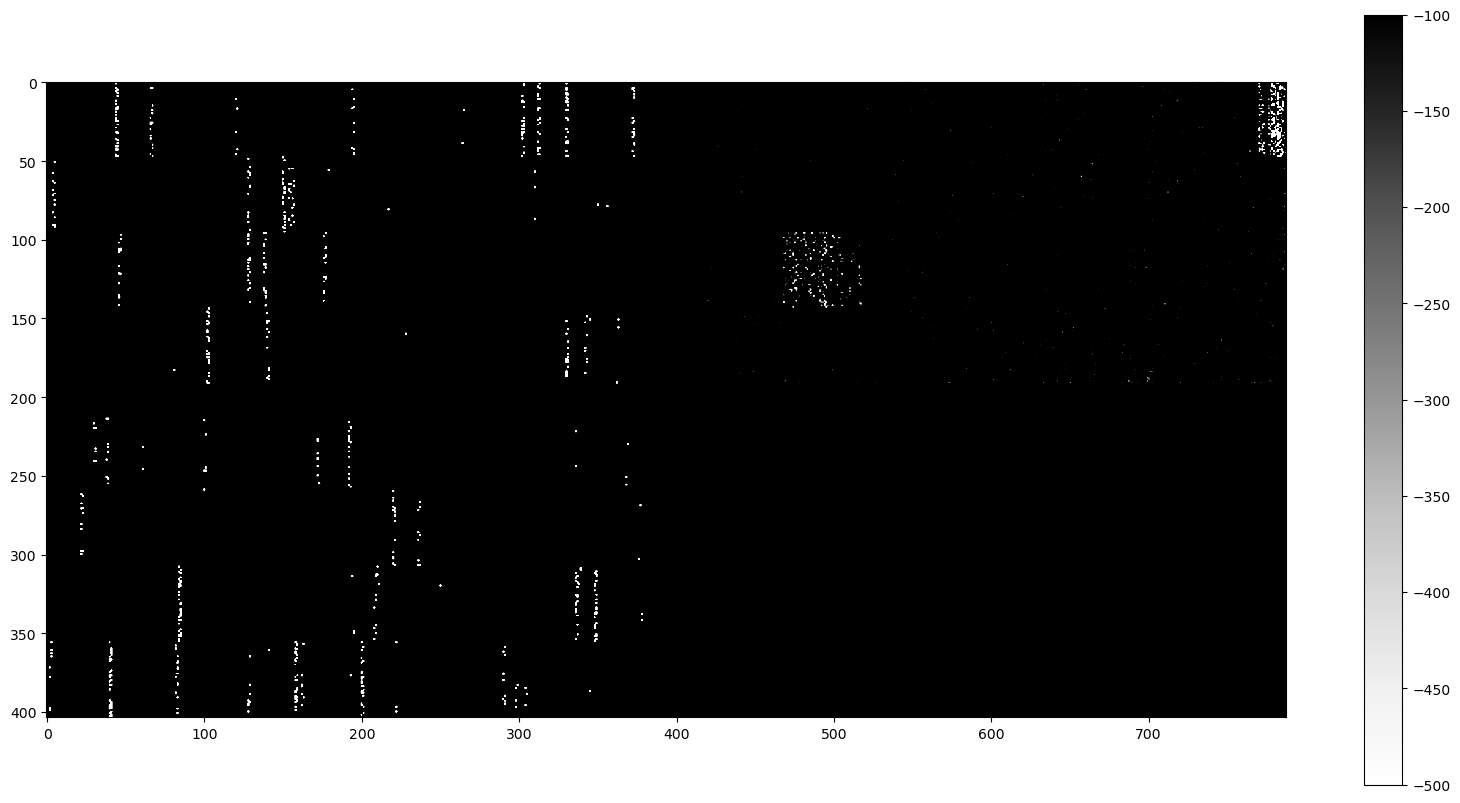

In [34]:
plt.figure(figsize = (20,10))
plt.imshow(inserted, cmap='Greys',  vmax = -100, vmin = -500)
plt.colorbar()

In [6]:
root.disableAndCleanAllFullRateDataRcv()
root.enableDataRcv(False)
root.enableDataDebug(False)